Data source: https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020

In [49]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.head(5))
print(exchange_rates.tail(5))
print(exchange_rates.info())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [50]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [51]:
exchange_rates['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64

In [52]:
exchange_rates.drop(exchange_rates[exchange_rates['US_dollar']=='-'].index, inplace=True)

In [53]:
exchange_rates['US_dollar']=exchange_rates['US_dollar'].astype(float)

In [54]:
exchange_rates['EUR']=1/exchange_rates['US_dollar']
dollar_to_euro = exchange_rates.copy()[['Time','EUR']]

In [55]:
dollar_to_euro['EUR'].value_counts().sort_index()

0.625391    1
0.627353    1
0.627707    1
0.627825    1
0.628180    1
           ..
1.192748    1
1.193745    1
1.201346    1
1.203804    1
1.211827    1
Name: EUR, Length: 3527, dtype: int64

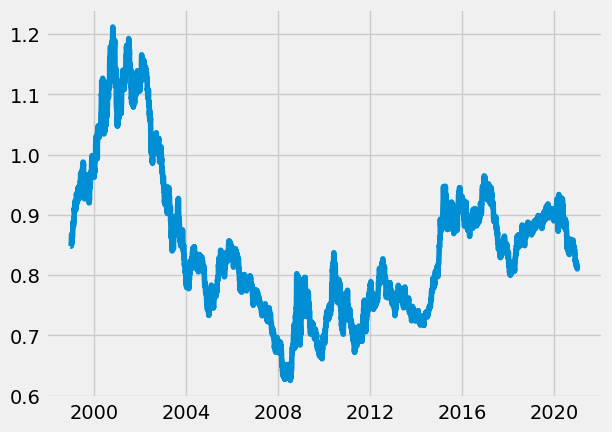

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dollar_to_euro['Time'],
         dollar_to_euro['EUR'])
plt.show()

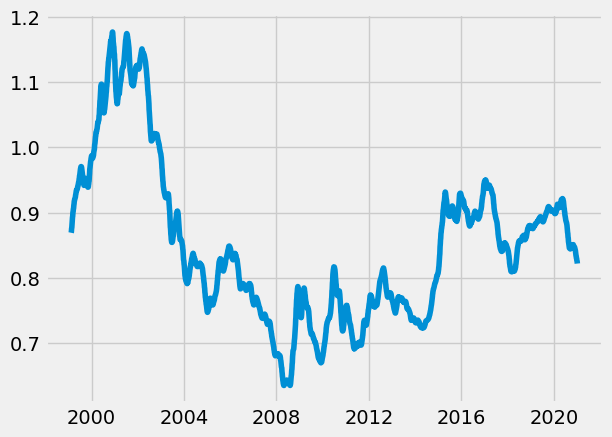

In [57]:
dollar_to_euro['rolling_mean']=dollar_to_euro['EUR'].rolling(30).mean()
plt.plot(dollar_to_euro['Time'],
         dollar_to_euro['rolling_mean'])
plt.show()

**Let´s analize the how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)).**

In [58]:
dollar_to_euro['Time']

0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
          ...    
5694   2021-01-04
5695   2021-01-05
5696   2021-01-06
5697   2021-01-07
5698   2021-01-08
Name: Time, Length: 5637, dtype: datetime64[ns]

In [59]:
bush = dollar_to_euro[dollar_to_euro['Time'].between('2001-01-01','2008-12-31')]
obama = dollar_to_euro[dollar_to_euro['Time'].between('2009-01-01','2016-12-31')]
trump = dollar_to_euro[dollar_to_euro['Time'].between('2017-01-01','2020-12-31')]

In [60]:
import matplotlib.style as style
style.use('fivethirtyeight')

C:\Users\Olga\AppData\Local\Temp\ipykernel_7280\3021045269.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["", 2001, "", 2003, "", 2005, "", 2007, "", 2009])
C:\Users\Olga\AppData\Local\Temp\ipykernel_7280\3021045269.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["", 2009, "", 2011, "", 2013, "", 2015, "", 2017])
C:\Users\Olga\AppData\Local\Temp\ipykernel_7280\3021045269.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels([2017, "", 2018, "", 2019, "", 2020, "", 2021, ""])


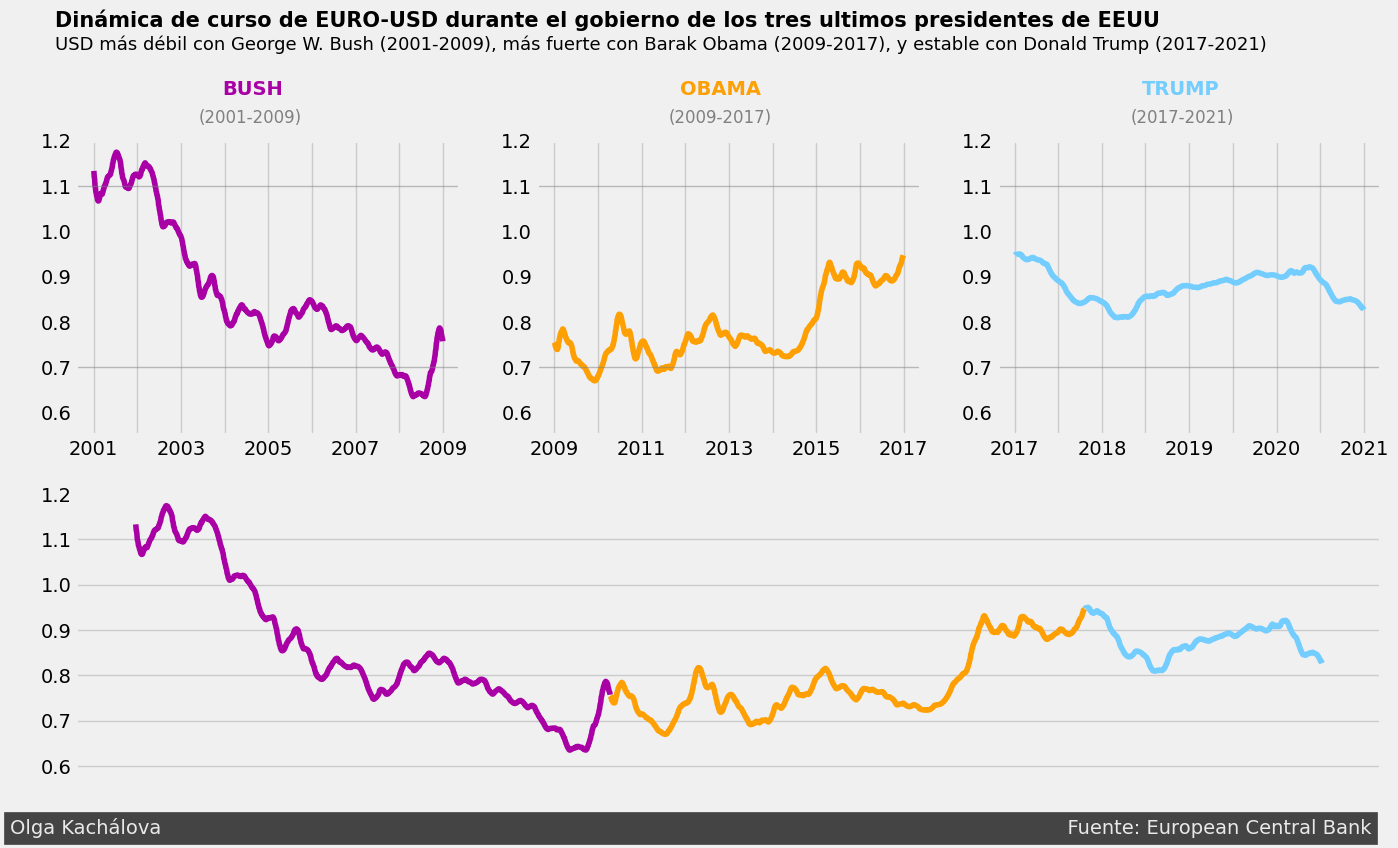

In [61]:
from matplotlib.gridspec import GridSpec

fig=plt.figure(figsize=(15,8))

gs=GridSpec(2,3) # 2 rows, 3 columns

ax1=fig.add_subplot(gs[0,0]) # First row, first column
ax2=fig.add_subplot(gs[0,1]) # First row, second column
ax3=fig.add_subplot(gs[0,2]) # First row, third column
ax4=fig.add_subplot(gs[1,:]) # Second row, span all columns

lila = '#a900a6'
orange = '#fea003'
blue = '#73cdff'
grey = '#dededb'

ax1.plot(bush['Time'], bush['rolling_mean'], color=lila)
ax1.set_ylim(0.55,1.2)
ax1.grid(axis='y')
ax1.axhline(0.7, color='grey', linewidth=1, alpha=0.5)
ax1.axhline(1.1, color='grey', linewidth=1, alpha=0.5)
ax1.set_xticklabels(["", 2001, "", 2003, "", 2005, "", 2007, "", 2009])
ax1.text(12400., 1.3, 'BUSH', size=14, color=lila, weight='bold')
ax1.text(12200., 1.24, '(2001-2009)', size=12, color='grey')

ax2.plot(obama['Time'], obama['rolling_mean'], color=orange)
ax2.set_ylim(0.55,1.2)
ax2.grid(axis='y')
ax2.axhline(0.7, color='grey', linewidth=1, alpha=0.5)
ax2.axhline(1.1, color='grey', linewidth=1, alpha=0.5)
ax2.set_xticklabels(["", 2009, "", 2011, "", 2013, "", 2015, "", 2017])
ax2.text(15300., 1.3, 'OBAMA', size=14, color=orange, weight='bold')
ax2.text(15200., 1.24, '(2009-2017)', size=12, color='grey')

ax3.plot(trump['Time'], trump['rolling_mean'], color=blue)
ax3.set_ylim(0.55,1.2)
ax3.grid(axis='y')
ax3.axhline(0.7, color='grey', linewidth=1, alpha=0.5)
ax3.axhline(1.1, color='grey', linewidth=1, alpha=0.5)
ax3.set_xticklabels([2017, "", 2018, "", 2019, "", 2020, "", 2021, ""])
ax3.text(17700., 1.3, 'TRUMP', size=14, color=blue, weight='bold')
ax3.text(17650., 1.24, '(2017-2021)', size=12, color='grey')


ax4.plot(bush['Time'], bush['rolling_mean'], color=lila)
ax4.plot(obama['Time'], obama['rolling_mean'], color=orange)
ax4.plot(trump['Time'], trump['rolling_mean'], color=blue)
ax4.set_ylim(0.55,1.2)
ax4.grid(axis='x')
ax4.set_xticklabels([])

ax1.text(11000., 1.45, 
         "Dinámica de curso de EURO-USD durante el gobierno de los tres ultimos presidentes de EEUU", 
         weight='bold', size=15)
ax1.text(11000., 1.4, 
         "USD más débil con George W. Bush (2001-2009), más fuerte con Barak Obama (2009-2017), y estable con Donald Trump (2017-2021)", 
         size=13)
ax4.text(10550., 0.45, 'Olga Kachálova' + ' ' * 145 + 'Fuente: European Central Bank',
         color='#e9e9e9',
         backgroundcolor='#444444')

plt.show()
